# Data Visualization using matplotlib
● Import the "City_Air_Quality.csv" dataset. 

● Explore the dataset to understand its structure and content. 

● Create line plots or time series plots to visualise the overall AQI trend over time.

● Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to visualise their trends over time.

● Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.

● Create box plots or violin plots to analyse the distribution of AQI values for different pollutant categories.

● Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.

# Import the "City_Air_Quality.csv" dataset. 

In [10]:
import pandas as pd

aqi = pd.read_csv('../../../Datasets/data.csv',encoding='latin1')
aqi.head()

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_10804\3163511865.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  aqi = pd.read_csv('../../../Datasets/data.csv',encoding='latin1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


# Explore the dataset to understand its structure and content. 

In [16]:
aqi['date'] = pd.to_datetime(aqi['date'])
aqi['year'] = aqi['date'].dt.year

In [17]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     291665 non-null  object        
 1   sampling_date                435739 non-null  object        
 2   state                        435742 non-null  object        
 3   location                     435739 non-null  object        
 4   agency                       286261 non-null  object        
 5   type                         430349 non-null  object        
 6   so2                          401096 non-null  float64       
 7   no2                          419509 non-null  float64       
 8   rspm                         395520 non-null  float64       
 9   spm                          198355 non-null  float64       
 10  location_monitoring_station  408251 non-null  object        
 11  pm2_5                     

In [12]:
aqi.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [13]:
aqi.shape

(435742, 13)

In [21]:
aqi.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
year                                7
dtype: int64

In [24]:
num_cols = ['so2','no2','rspm','spm','pm2_5']

for col in num_cols:
    mean = aqi[col].mean()
    aqi[col] = aqi[col].fillna(mean)

In [25]:
aqi.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
year                                7
dtype: int64

# Create line plots or time series plots to visualise the overall AQI trend over time.

In [26]:
pm2_5 = aqi.groupby('year').agg({'pm2_5':'mean'})
so2 = aqi.groupby('year').agg({'so2':'mean'})
no2 = aqi.groupby('year').agg({'no2':'mean'})
rspm = aqi.groupby('year').agg({'rspm':'mean'})
spm = aqi.groupby('year').agg({'spm':'mean'})

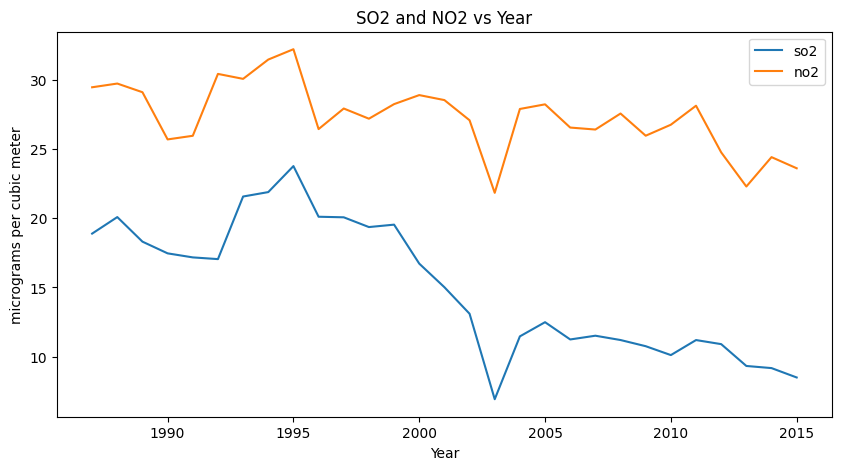

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('SO2 and NO2 vs Year')
plt.ylabel('micrograms per cubic meter')
plt.xlabel('Year')
plt.plot(so2,label='so2')
plt.plot(no2,label='no2')
# plt.plot(pm2_5,label='pm2.5')
# plt.plot(rspm,label='rspm')
# plt.plot(spm,label='spm')
plt.legend();

# Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to visualise their trends over time.

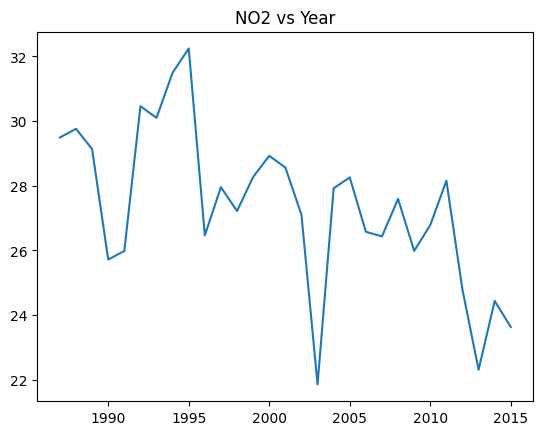

In [54]:
plt.title('NO2 vs Year')
plt.plot(no2);

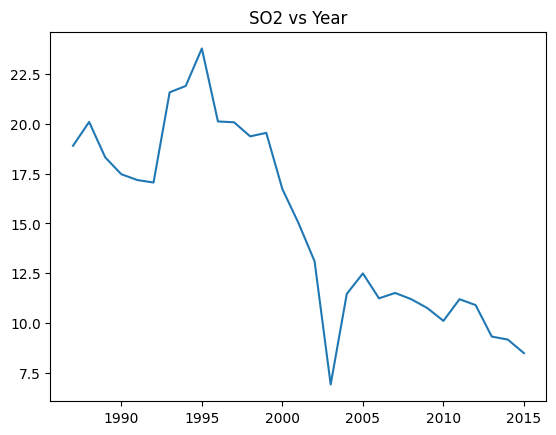

In [55]:
plt.title('SO2 vs Year')
plt.plot(so2);

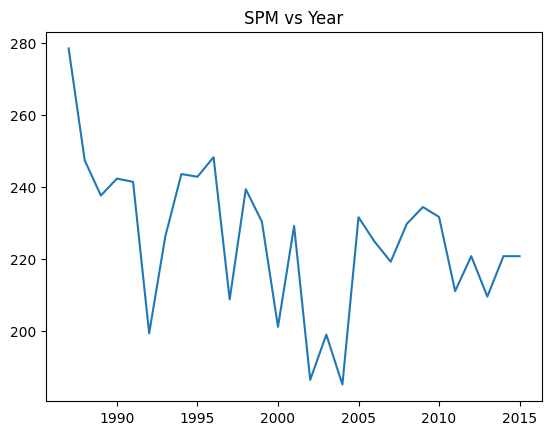

In [56]:
plt.title('SPM vs Year')
plt.plot(spm);

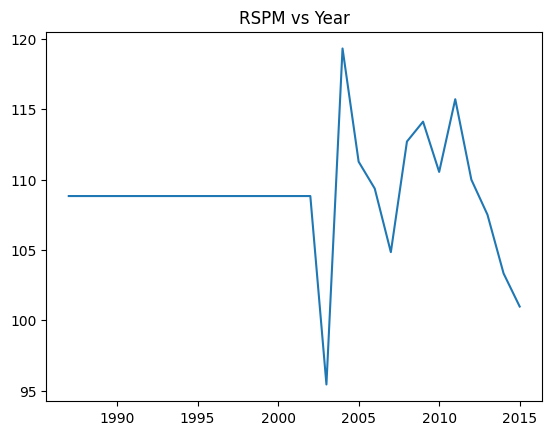

In [57]:
plt.title('RSPM vs Year')
plt.plot(rspm);

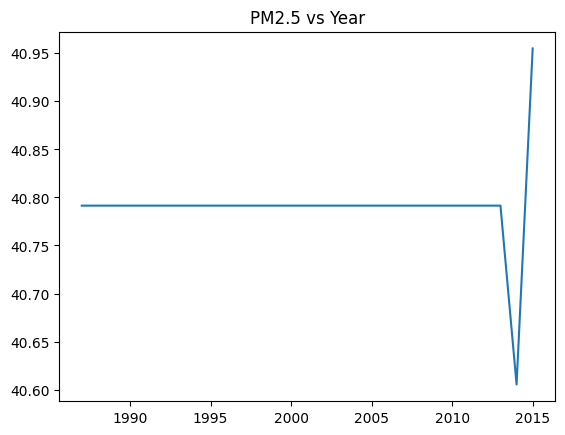

In [58]:
plt.title('PM2.5 vs Year')
plt.plot(pm2_5);

# Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.

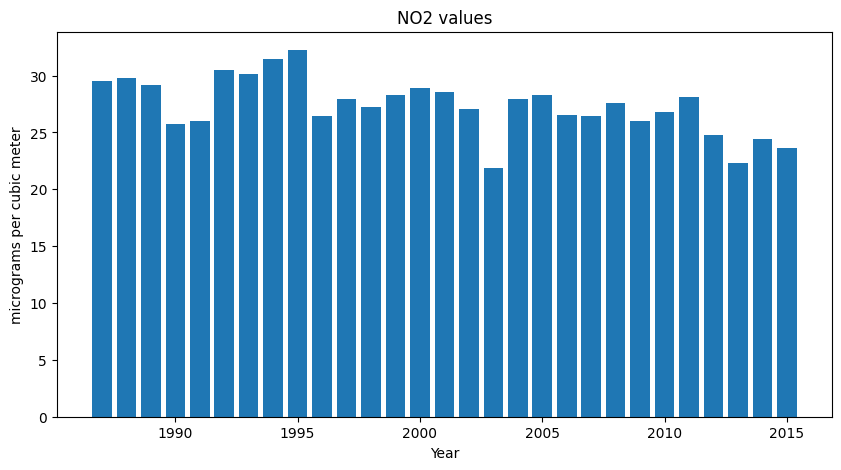

In [60]:
plt.figure(figsize=(10,5))
plt.title('NO2 values')
plt.xlabel('Year')
plt.ylabel('micrograms per cubic meter')
plt.bar(no2.index,no2.values.ravel());

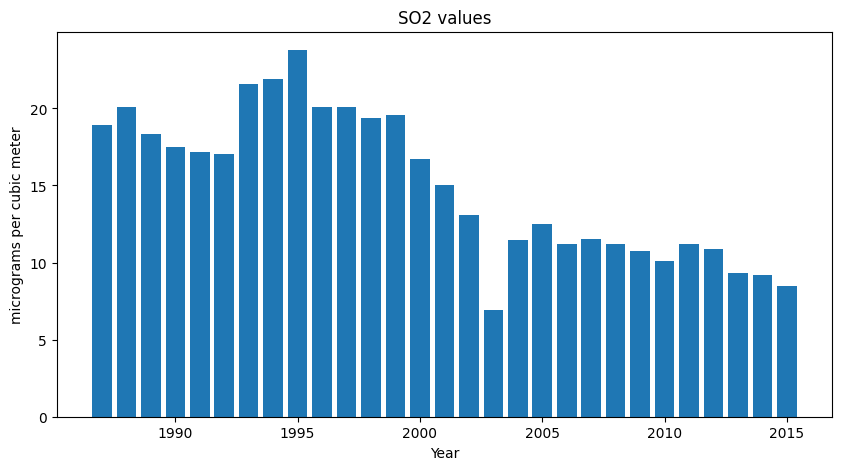

In [61]:
plt.figure(figsize=(10,5))
plt.title('SO2 values')
plt.xlabel('Year')
plt.ylabel('micrograms per cubic meter')
plt.bar(so2.index,so2.values.ravel());

# Create box plots or violin plots to analyse the distribution of AQI values for different pollutant categories.

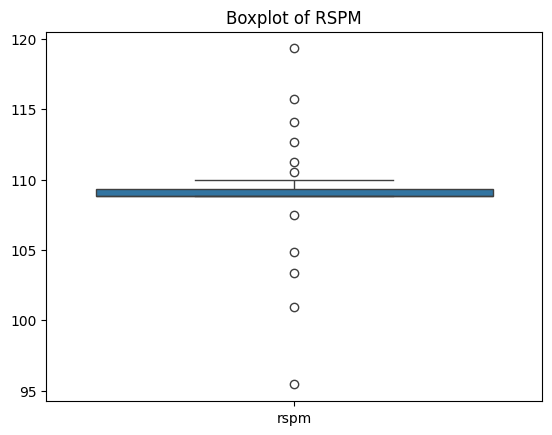

In [78]:
import seaborn as sns
plt.title('Boxplot of RSPM')
sns.boxplot(rspm);

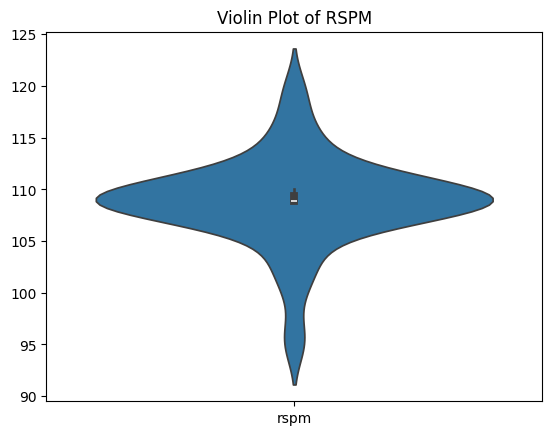

In [80]:
plt.title('Violin Plot of RSPM')
sns.violinplot(rspm);

# Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.

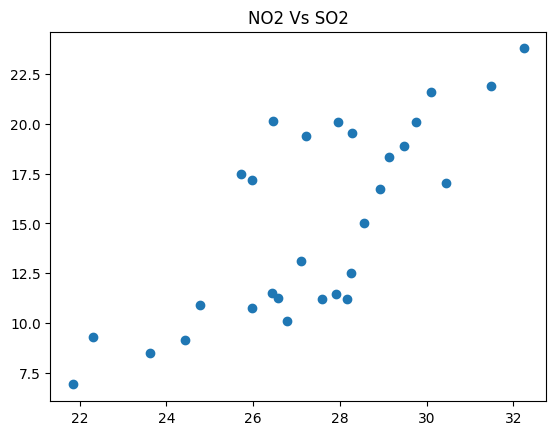

In [87]:
plt.title("NO2 Vs SO2")
plt.scatter(no2,so2);